In [18]:
import numpy as np
import matplotlib.pyplot as plt
import mplcursors

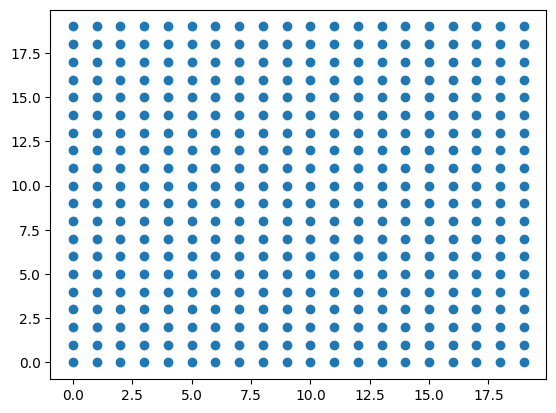

In [130]:
# Mesh
xc = np.arange(0,20,2)
yc = np.arange(0,20,2)
xc,yc = np.meshgrid(xc,yc)

plt.scatter(xc,yc)

In [136]:
n = input('Enter number of vehicles:' )
n = int(n)
coors = []
for i in range(n):
    c = input(f'Enter Coordinate for Car {i+1}:' )
    coors.append(c)
coordinate = [list(map(int, pair.split(','))) for pair in coors]


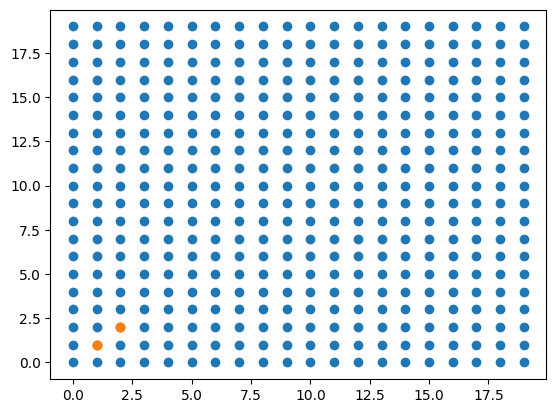

In [149]:
x = [pair[0] for pair in coordinate]
y = [pair[1] for pair in coordinate]

plt.scatter(xc,yc)
plt.scatter(x,y)


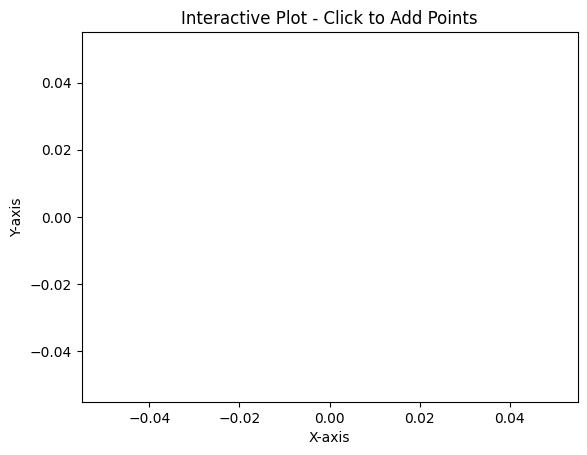